In [5]:
# AG_ADC1
#plots all velocity variance profiles


In [6]:

import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [7]:
# path for data
path_les= "../DATA_ADC_paper1/LES/"
path_adc= "../DATA_ADC_paper1/ADC/"
path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


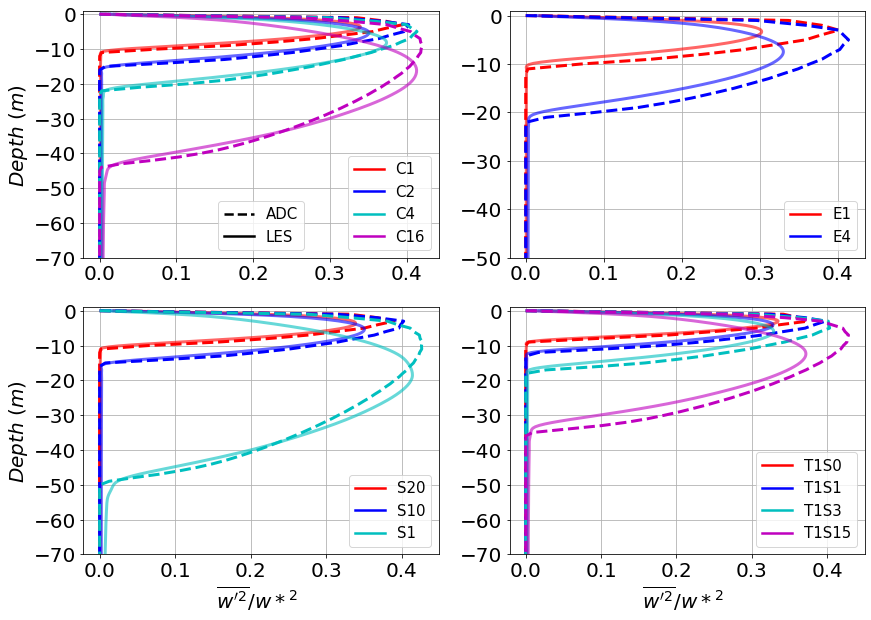

In [8]:
def wstar_sfc(wb,h):
    ws=(wb*(-h))**(1/3)
    #wb=g*(alpha*wt-beta*ws)
    return np.nanmean(ws**2)

# plot of mean profiles
# final hour 
t=95
# average duration
t1=t-6  
#depth
d=70

# plot
fig = plt.figure(figsize=(14,10))
#all C cases
plt.subplot(221)
#file names
file_names_les = [*[f"Cooling{x}" for x in [1, 2, 4, 16]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"C{x}" for x in [1, 2, 4, 16]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]
#plot LES
for fn, fm, ls, ls1 in zip(file_names_les,file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    wstar2=wstar_sfc(les.variables["wb"][t1:t,0],les.variables["H"][t1:t])
    plt.plot(np.mean(les.variables["w2"][t1:t,:],axis=0)/wstar2,les.variables["zt"][:],ls,alpha=0.6,linewidth=3)
#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['w2'][t1:t,0,:-1],axis=0)/wstar2,fh.variables['zTop'][1,0,:],ls1,linewidth=3)        
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='C1',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='C2',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='C4',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='m', label='C16',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)

#additional legend
legend_elements2 = [Line2D([0], [0], linestyle='--', color='k', label='ADC',markerfacecolor='k', linewidth=2.5),                 
                   Line2D([0], [0], linestyle='-', color='k', label='LES',markerfacecolor='k', linewidth=2.5),]                 
legend2=plt.legend(handles=legend_elements2,loc="lower center",fontsize=15)
plt.gca().add_artist(legend)

#axis properties
plt.ylim(-d,1); 
plt.grid()
#plt.text(19,-50, r'(a)', fontsize=20)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
#plt.xlabel('$\overline{{w^\prime}^2}$ $(m^2/s^2)$  ',fontsize=20)
#plt.xlabel('$\overline{{w^\prime}^2}/w*^2$  ',fontsize=20)

plt.ylabel('$Depth$ $(m)$ ',fontsize=20)
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))



#all E cases
plt.subplot(222)
#file names
file_names_les = [*[f"Evap{x}" for x in [1, 4]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"E{x}" for x in [1, 4]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

for fn, fm, ls, ls1 in zip(file_names_les,file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    wstar2=wstar_sfc(les.variables["wb"][t1:t,0],les.variables["H"][t1:t])
    plt.plot(np.mean(les.variables["w2"][t1:t,:],axis=0)/wstar2,les.variables["zt"][:],ls,alpha=0.6,linewidth=3)
#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['w2'][t1:t,0,:-1],axis=0)/wstar2,fh.variables['zTop'][1,0,:],ls1,linewidth=3)

legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='E1',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='E4',markerfacecolor='k', linewidth=2.5),
                ] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)

plt.ylim(-50,1)
#plt.text(36.25,-35, r'(b)', fontsize=20)
plt.grid()
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
#plt.xlabel('$\overline{{w^\prime}^2}/w*^2$  ',fontsize=20)

#plt.xlabel('$\overline{{w^\prime}^2}$ $(m^2/s^2)$  ',fontsize=20)
plt.locator_params(axis='x', nbins=5)



plt.subplot(223)
file_names_les = [*[f"Strat{x}" for x in [20, 10, 1]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"S{x}" for x in [20,10, 1]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

for fn, fm, ls, ls1 in zip(file_names_les, file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    wstar2=wstar_sfc(les.variables["wb"][t1:t,0],les.variables["H"][t1:t])
    plt.plot(np.mean(les.variables["w2"][t1:t,:],axis=0)/wstar2,les.variables["zt"][:],ls,alpha=0.6,linewidth=3)

#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['w2'][t1:t,0,:-1],axis=0)/wstar2,fh.variables['zTop'][1,1,:],ls1,linewidth=3)
#
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='S20',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='S10',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='S1',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)
plt.ylim(-d,1)
plt.grid()
plt.xlabel('$\overline{{w^\prime}^2}/w*^2$  ',fontsize=20)

#plt.xlabel('$\overline{{w^\prime}^2}$ $(m^2/s^2)$  ',fontsize=20)
#plt.text(19,-50, r'(c)', fontsize=20)
#plt.legend(["S20","S10","S1"],fontsize=14)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.ylabel('$Depth$ $(m)$ ',fontsize=20)




plt.subplot(224)
file_names_les = [*[f"T1S{x}" for x in [0, 1, 3, 15]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"T1S{x}" for x in [0, 1, 3, 15]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

for fn, fm, ls, ls1 in zip(file_names_les,file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    wstar2=wstar_sfc(les.variables["wb"][t1:t,0],les.variables["H"][t1:t])
    plt.plot(np.mean(les.variables["w2"][t1:t,:],axis=0)/wstar2,les.variables["zt"][:],ls,alpha=0.6,linewidth=3)

#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['w2'][t1:t,0,:-1],axis=0)/wstar2,fh.variables['zTop'][1,1,:],ls1,linewidth=3)

legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='T1S0',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='T1S1',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='T1S3',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='m', label='T1S15',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)

plt.grid()
plt.xlabel('$\overline{{w^\prime}^2}/w*^2$  ',fontsize=20)
#plt.xlabel('$\overline{{w^\prime}^2}$ $(m^2/s^2)$  ',fontsize=20)
#plt.text(1027.75, -55,"(d)", fontsize=20)
plt.ylim(-d,1)
#plt.locator_params(axis='x', nbins=5) # to decide number of points in axis
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig("w2_les_adc_2.eps")
